# Statistical Analysis Project
## Part 2 - Statistical Inference: Estimation and Hypothesis Testing
#### Adi Hatav and Tamar Dufour Dror

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import norm
import math
import numpy as np
import scipy.stats as stats

In [20]:
df = pd.read_csv('CVD_cleaned.csv')
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168,81.65,29.05,No,4,30,8,0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180,69.85,21.48,No,8,15,60,4
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157,61.23,24.69,Yes,4,40,8,4
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183,79.38,23.73,No,3,30,12,0


### Estimation
#### In this section, we will analyze the effect of depression on the respondents BMI, among women aged 18-64.


In [21]:
def r(float):
    return(round(float, 3))

women_df = df[df["Sex"]=='Female']
ages_catrgories = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64']
women_df = women_df[women_df["Age_Category"].isin(ages_catrgories)][["Depression","BMI"]]

women_df_dep = women_df[women_df["Depression"]=="Yes"]
women_df_non_dep = women_df[women_df["Depression"]=="No"]

dep_women = women_df_dep["BMI"].count()
non_dep_women = women_df_non_dep["BMI"].count()

print("There are", dep_women,"women who reported being depressed, constituting ",round((dep_women/(dep_women+non_dep_women)),3), "% of all women in the data")
print("There are",non_dep_women, "women who reported not being depressed, constituting", round((non_dep_women/(dep_women+non_dep_women)),3), "% of all women in the data")

There are 29989 women who reported being depressed, constituting  0.296 % of all women in the data
There are 71474 women who reported not being depressed, constituting 0.704 % of all women in the data


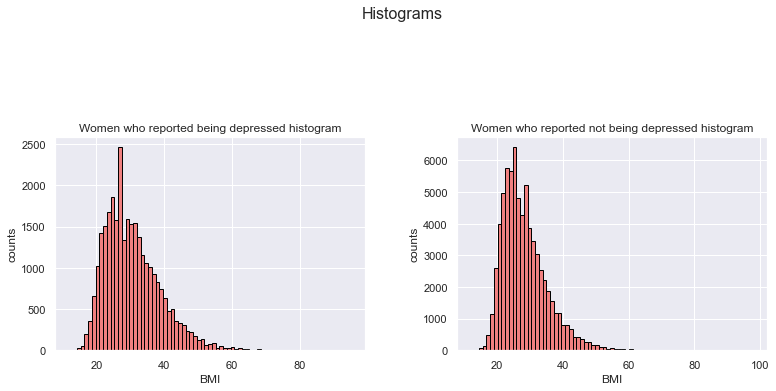

In [22]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle('Histograms', fontsize=16)
fig.tight_layout(pad=5.0) 
axs[0].hist(women_df_dep["BMI"], bins=75, ec="black", color="lightcoral")
axs[0].set(ylabel="counts", xlabel= "BMI", title= "Women who reported being depressed histogram")
axs[1].hist(women_df_non_dep["BMI"], bins=75, ec="black", color="lightcoral")
axs[1].set(ylabel="counts", xlabel= "BMI", title="Women who reported not being depressed histogram")

plt.show()

In [23]:
women_df_dep_mean = women_df_dep["BMI"].mean()
women_df_non_dep_mean = women_df_non_dep["BMI"].mean()
women_df_dep_var = women_df_dep["BMI"].var()
women_df_non_dep_var = women_df_non_dep["BMI"].var()
print("For women who reported being depressed, the mean BMI is: ", round(women_df_dep_mean,2), "and the variance is: ",round(women_df_dep_var,2))
print("For women who reported not being depressed, the mean BMI is: ", round(women_df_non_dep_mean,2), "and the variance is: ",round(women_df_non_dep_var, 2))


For women who reported being depressed, the mean BMI is:  30.63 and the variance is:  68.94
For women who reported not being depressed, the mean BMI is:  28.29 and the variance is:  48.39


In [24]:
se_non_dep = ((women_df_non_dep_var/non_dep_women))**0.5
se_dep = ((women_df_dep_var/dep_women))**0.5

print("S.E estimator for women who reported being depressed mean: ", r(se_dep))
print("S.E estimator for women who reported not being depressed mean: ", r(se_non_dep))

S.E estimator for women who reported being depressed mean:  0.048
S.E estimator for women who reported not being depressed mean:  0.026


In [25]:
alpha = 0.05
z_quantile = norm.ppf(1 - (alpha/ 2))
CI_dep = (r(women_df_dep_mean-z_quantile*se_dep), r(women_df_dep_mean+z_quantile*se_dep))
CI_non_dep = (r(women_df_non_dep_mean - z_quantile*se_non_dep),r(women_df_non_dep_mean + z_quantile*se_non_dep))
print("Mean BMI confidence interval for women who reported being depressed: ", CI_dep)
print("Mean BMI confidence interval for women who reported not being depressed: ", CI_non_dep)

Mean BMI confidence interval for women who reported being depressed:  (30.532, 30.72)
Mean BMI confidence interval for women who reported not being depressed:  (28.235, 28.337)


<ErrorbarContainer object of 3 artists>

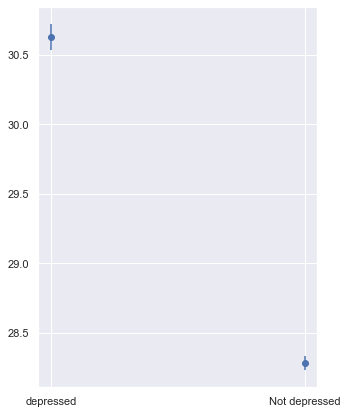

In [35]:
intervals = [CI_dep, CI_non_dep]
plt.figure(figsize=(5,7))

plt.errorbar(x=["depressed","Not depressed"],
             y=[women_df_dep_mean, women_df_non_dep_mean],
             yerr=[(top-bot)/2 for top,bot in intervals],
             capsize = 0.01,
             fmt='o')


#### Note that the confidence intervals can overlap depending on the value of alpha:
$\hat{\mu_{nondep}}+\hat{s.e_{nondep}}*z_{\alpha/2}\geq\hat{\mu_{dep}}-\hat{s.e_{dep}}*z_{\alpha/2}$
<br>
$z_{\alpha/2}\geq 31.63$

##### Therefore, for any reasonable conffidence level, the confidence intervals do not overlap

### Hypothesis Testing

#### Define Hypothesis:
Let $\mu_1$ be the expectation of the BMI of women who reported being depressed,
and let $\mu_2$ be the expectation of the BMI of women who reported not being depressed.
<br>
$H_0: \mu_1-\mu_2 =0$
<br>
$H_0: \mu_1-\mu_2 \neq 0$
<br><br>
To use T-Test to test the above hypothesis, we first will verify that the T-Test assumptions holds:
1. All of the observations are i.i.d
2. The data's distribution is normal
3. The variances are equal (F-test)

In [9]:
#F test:
def is_equal(bool_val):
    if bool_val:
        return("not equal")
    return("equal")
    
F_statistic = women_df_dep_var/women_df_non_dep_var 
F_test_quantile = stats.f.ppf(0.99, dep_women-1, non_dep_women-1)
print("F_statistic: ",r(F_statistic))
print("F_test_quantile: ",r(F_test_quantile))
print("for 99% the null hypothesis is "+ str(not(F_statistic>F_test_quantile)), "therefore the variances are",is_equal((F_statistic>F_test_quantile)) )

F_statistic:  1.425
F_test_quantile:  1.023
for 99% the null hypothesis is False therefore the variances are not equal


Wald test:<br>
As our test - statistics is the difference between two means, it's a MLE. Therefore, this test - statistics is asymptotically Normal. Hence, we can use Wald test: reject $H_0$ when $|W|>z_{\alpha/2}$ where $ W = \frac{\hat{\theta}-\theta_0}{\hat{s.e}}$

In [10]:
theta_estimator = women_df_dep_mean-women_df_non_dep_mean
theta0 = 0
se = ((women_df_dep_var/dep_women)+(women_df_non_dep_var/non_dep_women))**0.5
Wald_statistic = (theta_estimator-theta0)/se
quantile = stats.norm.ppf(0.99)
P_value_wald = 2*norm.cdf(-abs(Wald_statistic))

print("Wald statistic: ", round(Wald_statistic,3))
print("0.99 Z quantile: ", round(quantile,3))
print("P value " + str(P_value_wald))

Wald statistic:  42.905
0.99 Z quantile:  2.326
P value 0.0


Therefore we reject the null hypothesis according to Wald test

Likelihood Ratio Tests:<br>
Despite the results of F-test, and that fact that the histograms above apparently are not Normal, we will assume here that the variances are equal, and both groups (depressed and not- depressed) are normal distributions.<br>
Therefore, we can use the likelijood ratio test:<br>
$\lambda = 2log(\frac{L(\hat{\theta})}{L(\hat{\theta_0})})$, where $\hat{\theta}$ is the MLE and $\hat{\theta_0}$ is the restricted lie in $\Theta_0$.

In [11]:
def calc_sum(sigma_squared, Sp_squared, mu, mu_i,length, data):
    total_sum=0
    for i in range(length):
        total_sum += ((data[i]-mu)**2)/(2* sigma_squared)
        total_sum -= ((data[i]-mu_i)**2)/(2* Sp_squared)
    return total_sum

In [12]:
Sp_squared = ((dep_women-1)*women_df_dep_var + (non_dep_women-1)*women_df_non_dep_var)/(dep_women+non_dep_women-2)
n = dep_women + non_dep_women
sigma_estimator = women_df["BMI"].var()
mu = women_df["BMI"].mean()
likelihood_test = (n/2)*math.log(sigma_estimator/Sp_squared)\
+calc_sum(sigma_estimator, Sp_squared,mu, women_df_dep_mean,dep_women,women_df_dep["BMI"].values)\
+calc_sum(sigma_estimator, Sp_squared,mu, women_df_non_dep_mean,non_dep_women,women_df_non_dep["BMI"].values)
print("lambda:",r(likelihood_test))
quantile = stats.chi2.ppf(0.95,1)
print("0.95 quantile:", r(quantile))
print("reject H0:" ,likelihood_test>quantile)

lambda: 1051.46
0.95 quantile: 3.841
reject H0: True


### Different Data Set Sizes
in this section, we will repeat the same statistical analyses we did above, but on samples of different sizes.

In [13]:
def find_CI_and_Wald(num_iterations, data):
    sizes = [30,50,100,500]
    res_dep ={30:[], 50:[], 100:[], 500:[]}
    res_non_dep ={30:[], 50:[], 100:[], 500:[]}
    wald_test ={30:[], 50:[], 100:[], 500:[]}
    for i in range(num_iterations):
        for size in sizes:
            #CI
            sample = data.sample(n = size)
            sample_dep = sample[sample["Depression"]=="Yes"]["BMI"]
            sample_non_dep = sample[sample["Depression"]=="No"]["BMI"]

            sample_dep_mean = sample_dep.mean()
            sample_non_dep_mean = sample_non_dep.mean()

            sample_dep_se = (sample_dep.var()/sample_dep.count())**0.5
            sample_non_dep_se = (sample_non_dep.var()/sample_non_dep.count())**0.5

            res_dep[size].append([i,round(sample_dep_mean - 2*sample_dep_se,3),round(sample_dep_mean + 2*sample_dep_se,3)])
            res_non_dep[size].append([i,round(sample_non_dep_mean - 2*sample_non_dep_se, 3),round(sample_non_dep_mean + 2*sample_non_dep_se,3)])
            #Wald
            theta_estimator = sample_dep_mean-sample_non_dep_mean
            theta0 = 0
            se = ((sample_dep.var()/sample_dep.count())+(sample_non_dep.var()/sample_non_dep.count()))**0.5
            Wald_statistic = (theta_estimator-theta0)/se
            quantile = stats.norm.ppf(0.95)
            P_value_wald = norm.cdf(-abs(Wald_statistic))
            P_value_wald = 2*P_value_wald
            wald_test[size].append([i, Wald_statistic, quantile, "reject --> "+str(abs(Wald_statistic)>quantile), round(P_value_wald,3)])
    return  res_dep, res_non_dep,wald_test
    

In [14]:
def print_CI(dict, i, j):
    for key in dict.keys():
        val = dict[key][0]
        print(key, ": (", val[i], ",",val[j],")")

dep_CI,non_dep_CI , wald_test = find_CI_and_Wald(1, women_df)
print("Confidence intervals for the expectaion of depressed women:")
print_CI(dep_CI, 1, 2)
print("\nConfidence intervals for the expectaion of not-depressed women:")
print_CI(non_dep_CI, 1, 2)
print("\nWald test: (P-value, accept\ reject)")
print_CI(wald_test, 4 , 3)


Confidence intervals for the expectaion of depressed women:
30 : ( 26.781 , 40.665 )
50 : ( 26.897 , 34.797 )
100 : ( 27.27 , 33.218 )
500 : ( 29.82 , 32.342 )

Confidence intervals for the expectaion of not-depressed women:
30 : ( 25.615 , 31.07 )
50 : ( 26.688 , 31.203 )
100 : ( 25.59 , 28.247 )
500 : ( 27.515 , 28.954 )

Wald test: (P-value, accept\ reject)
30 : ( 0.149 , reject --> False )
50 : ( 0.403 , reject --> False )
100 : ( 0.041 , reject --> True )
500 : ( 0.0 , reject --> True )


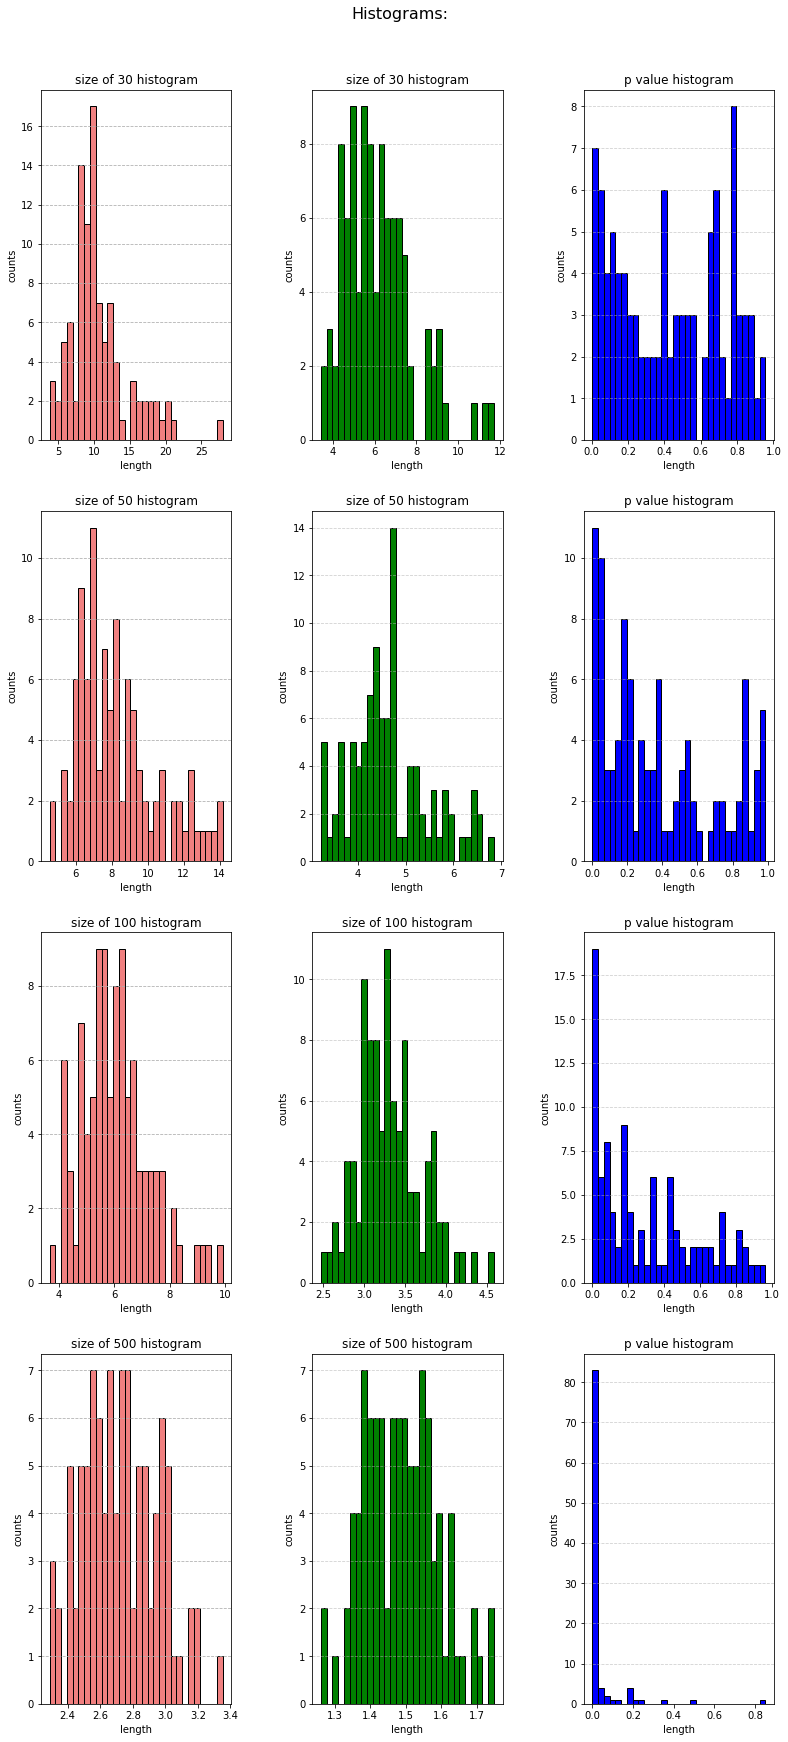

In [15]:
dep_CI_100,non_dep_CI_100 , wald_test_100 = find_CI_and_Wald(100, women_df)
fig, axs = plt.subplots(nrows=4 , ncols=3, figsize=(12, 25))
fig.suptitle('Histograms:', fontsize=16)
fig.tight_layout(pad=5.0)
for i, size in enumerate(dep_CI_100.keys()):
    diff_dep = [x[2]-x[1] for x in dep_CI_100[size]]
    diff_non_dep = [x[2]-x[1] for x in non_dep_CI_100[size]]

    axs[i][0].hist(diff_dep, bins=30, ec="black", color="lightcoral")
    axs[i][0].set(ylabel="counts", xlabel= "length", title="size of "+ str(size) +" histogram")
    axs[i][0].yaxis.grid(True, linestyle='--')
    axs[i][1].yaxis.grid(True, alpha=0.6, linestyle='--')
    axs[i][1].hist(diff_non_dep, bins=30, ec="black", color="green")
    axs[i][1].set(ylabel="counts", xlabel= "length", title="size of "+ str(size) +" histogram")
    axs[i][2].yaxis.grid(True, alpha=0.6, linestyle='--')
    axs[i][2].hist([x[4] for x in wald_test_100[size]], bins=30, ec="black", color="blue")
    axs[i][2].set(ylabel="counts", xlabel= "length", title="p value histogram")

plt.show()

In [16]:
def find_CI_length_and_calc(dep_CI_100,non_dep_CI_100, wald_test_100, women_df_dep_mean, women_df_non_dep_mean):
    CI_sizes_dep =dict.fromkeys([30,50,100,500])
    CI_sizes_non_dep =dict.fromkeys([30,50,100,500])
    p_val = dict.fromkeys([30,50,100,500])
    in_CI_dep = {30:0, 50:0, 100:0, 500:0}
    in_CI_non_dep = {30:0, 50:0, 100:0, 500:0}
    for size in dep_CI_100.keys():
        diff_dep = [x[2]-x[1] for x in dep_CI_100[size]]
        diff_non_dep = [x[2]-x[1] for x in non_dep_CI_100[size]]
        p_val_size = [x[4] for x in wald_test_100[size]]
        CI_sizes_dep[size] = pd.DataFrame(diff_dep)
        CI_sizes_non_dep[size] = pd.DataFrame(diff_non_dep)
        p_val[size] = pd.DataFrame(p_val_size)
        for i in range(100):
            in_CI_dep[size] += 1 if dep_CI_100[size][i][1]<= women_df_dep_mean <= dep_CI_100[size][i][2] else 0
            in_CI_non_dep[size] += 1 if non_dep_CI_100[size][i][1]<= women_df_non_dep_mean <= non_dep_CI_100[size][i][2] else 0
    
        
    return CI_sizes_dep, CI_sizes_non_dep, p_val,in_CI_dep,in_CI_non_dep

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

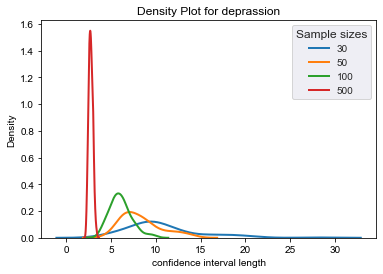

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

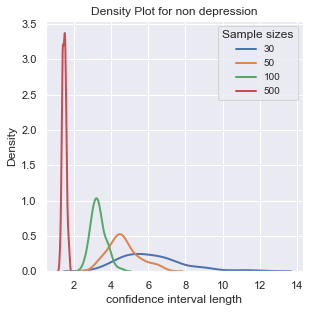

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

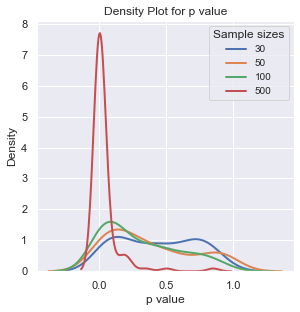

In [17]:
sizes = [30,50,100,500]
CI_sizes_dep, CI_sizes_non_dep, p_val,in_CI_dep,in_CI_non_dep = find_CI_length_and_calc(dep_CI_100,non_dep_CI_100, wald_test_100, women_df_dep_mean, women_df_non_dep_mean)
categories = [CI_sizes_dep, CI_sizes_non_dep, p_val]
names = ["deprassion", "non depression", "p value"]

# Iterate through the different sample- sizes
for category, name in zip(categories,names):
    for sample_size in sizes:
        sns.distplot(category[sample_size], hist = False, kde = True, kde_kws = {'linewidth': 2})
    sns.set(rc={'figure.figsize':(4.6,4.6)})
    plt.legend(prop={'size': 10}, title = 'Sample sizes', labels=["30", "50", "100", "500"])
    plt.title('Density Plot for ' + name  )
    plt.xlabel("p value" if name == "p value" else 'confidence interval length')
    plt.ylabel('Density')
    plt.show()


As expected, the larger the sample, the smaller the concentration of confidence intervals

In [18]:
print("The precentage of confidence intervals for the mean of depressed- women that includes the mean according to the full data:")
print(in_CI_dep)
print("The precentage of confidence intervals for the mean of non-depressed women that includes the mean according to the full data:")
print(in_CI_non_dep)

The precentage of confidence intervals for the mean of depressed- women that includes the mean according to the full data:
{30: 88, 50: 93, 100: 92, 500: 94}
The precentage of confidence intervals for the mean of non-depressed women that includes the mean according to the full data:
{30: 92, 50: 95, 100: 95, 500: 95}
